In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch
import torchvision.models as models

In [10]:
# Load the Pre-Trained ResNet Model
resnet_cnn = models.resnet18(pretrained=True)
resnet_cnn.eval()

c:\Users\seanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\seanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
def make_img_same_dimension(dimx, dimy):
    acipenseridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Acipenseriformes/Acipenseridae (Sturgeons)/")
    polyodontidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Acipenseriformes/Polyodontidae (Paddlefishes)/")
    albulidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Albuliformes/Albulidae (Bonefish)/")
    amiidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Amiiformes/Amiidae (Bowfins)/")
    ateleopodidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Ateleopodiformes/Ateleopodidae (Jellynose Fishes)/")
    atherinopsidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Atheriniformes/Atherinopsidae (Silversides)/")
    alepisauridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Alepisauridae (Lancetfish)/")
    aulopidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Aulopidae (Flagfish)/")
    synodontidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Synodontidae (Lizardfish)/")
    batrachoididae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Batrachoidiformes/Batrachoididae (Toadfish)/")
    belonidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Beloniformes/Belonidae (Needlefish)/")
    exocoetidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Beloniformes/Exocoetidae (Flyingfish)/")
    anoplogastridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Bercyiformes/Anoplogastridae (Fangtooth)/")
    proscyllidae_imgs = os.fsencode("../Fish Photos/Chondrichthyes/Carcharhiniformes/Proscyllidae (Finback Catshark)/")
    ceratodontidae_imgs = os.fsencode("../Fish Photos/Chondrichthyes/Ceratodontiformes/Ceratodontidae (Australian Lungfish)/")
    
    fields = []
    for file in os.listdir(acipenseridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Acipenseriformes/Acipenseridae (Sturgeons)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Acipenseridae-(Sturgeons)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(polyodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Acipenseriformes/Polyodontidae (Paddlefishes)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Polyodontidae-(Paddlefish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)

    for file in os.listdir(albulidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Albuliformes/Albulidae (Bonefish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Albulidae-(Bonefish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(amiidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Amiiformes/Amiidae (Bowfins)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Amiidae-(Bowfins)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)

    for file in os.listdir(ateleopodidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Ateleopodiformes/Ateleopodidae (Jellynose Fishes)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Ateleopodidae-(Jellynose Fishes)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(atherinopsidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Atheriniformes/Atherinopsidae (Silversides)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Atherinopsidae-(Silversides)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
        
    for file in os.listdir(alepisauridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Alepisauridae (Lancetfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Alepisauridae-(Lancetfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(aulopidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Aulopidae (Flagfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Aulopidae-(Flagfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(synodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Synodontidae (Lizardfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Synodontidae-(Lizardfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(batrachoididae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Batrachoidiformes/Batrachoididae (Toadfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Batrachoididae-(Toadfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(belonidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Beloniformes/Belonidae (Needlefish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Belonidae-(Needlefish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(exocoetidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Beloniformes/Exocoetidae (Flyingfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Exocoetidae-(Flyingfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(anoplogastridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Bercyiformes/Anoplogastridae (Fangtooth)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Anoplogastridae-(Fangtooth)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(proscyllidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Chondrichthyes/Carcharhiniformes/Proscyllidae (Finback Catshark)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Proscyllidae-(Finback Catshark)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)
    
    for file in os.listdir(ceratodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Chondrichthyes/Ceratodontiformes/Ceratodontidae (Australian Lungfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = ["Ceratodontidae-(Australian Lungfish)"]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        fields.append(img_as_csv)

    with open('images.csv', 'a',newline='') as imageFile:
            csv_writer = csv.writer(imageFile)
            for i in range(len(fields)):
                csv_writer.writerow(fields[i])
    return
make_img_same_dimension(150,150)

In [12]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [13]:
class ReadDataCSV(Dataset):
    def __init__(self, csv_file_path, transform=None):
        data = pd.read_csv(csv_file_path)

        raw = data.to_numpy
        num_images = data.shape[0]
        image_as_array = data.values[:,1:]
        label_as_array = data.values[:,0]
        print("data shape: " + str(data.values.shape))
        self.images_numpy = image_as_array.reshape(num_images, 150, 150, 3)
        self.targets = label_as_array
        self.transform = transform
    
    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        img, target = self.images_numpy[index], self.targets[index]
        img = img.squeeze().astype(np.uint8)
        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [14]:
dataset = ReadDataCSV("images.csv",transform=img_transform)
batch_size = 256
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

data shape: (290, 67501)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


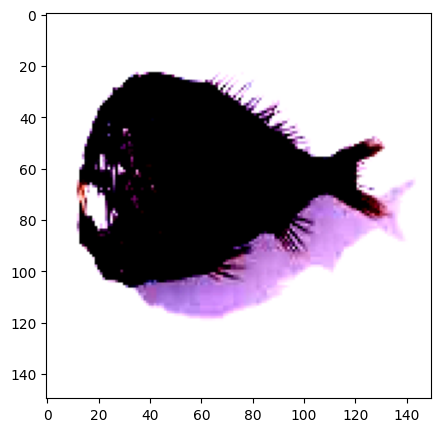

In [15]:
[imgs,labels] = (next(iter(dataloader)))
imgs = np.squeeze(imgs)
plt.figure(figsize=(5,5))
plt.imshow(imgs[0].permute(1,2,0).cpu().numpy())

In [17]:
# Load the Pre-Trained ResNet Model
resnet_cnn = models.resnet18()
for param in resnet_cnn.parameters():
    param.requires_grad = False
resnet_cnn.fc = torch.nn.Linear(resnet_cnn.fc.in_features, 290)
for param in resnet_cnn.fc.parameters():
    param.requires_grad = True
resnet_cnn.eval()

# Move the model to the GPU if possible
if torch.cuda.is_available():
    resnet_cnn.to('cuda')

for inputs, labels in dataloader:
    if torch.cuda.is_available():
        inputs = inputs.to('cuda')
    
    with torch.no_grad():
        outputs = resnet_cnn(inputs)
    probabilities = torch.nn.functional.softmax(outputs, dim=1)

    _, predicted_indices = torch.max(probabilities, 1)

    # for i in range(len(labels)):
    #     print(f'Predicted class: {dataset.targets[predicted_indices[i]]}, Ground truth: {dataset.targets[labels[i]]}')
    correct = 0
    for i, label in enumerate(labels):
        # print("Predicted class: " + str(dataset.targets[predicted_indices[i]]) + ", Ground Truth Class: " + label)
        if dataset.targets[predicted_indices[i]] == label:
            correct += 1
    print("correct: " + str(correct) + ", wrong: " + str(len(labels)-correct))
    # # Debug the probabilities tensor
    # print("Probabilities shape:", dataset.targets.shape)
    # print("Probabilities values:", dataset.images_numpy.shape)

    # # Debug the predicted indices
    # print("Predicted indices max value:", torch.max(predicted_indices))

correct: 22, wrong: 234
correct: 2, wrong: 32
